## Suprise Housing , house price evaluation model using Linear, Ridge and Lasso Regression

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation
- Improvise test data set score and drop coefficients using Regularization
- Also check if Grid search CV helps in simpliflying the model for same r2 score.

### 1. Import the required libraries

since , it is a multi linear regression needing accuracy management , regularization etc.. let's import all needed ones.

In [311]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

### 2. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [312]:
# reading the dataset
houses = pd.read_csv("train.csv")

In [313]:
# summary of the dataset: 1460 rows, 81 columns, no null values
print(houses.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [314]:
# head
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 3. Understanding the Data Dictionary and Data cleaning

The data dictionary contains the meaning of various attributes; some non-obvious ones are:

In [315]:
houses.describe()
# as per houses.info() , we see 38 numeric columns , we see same in describe 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [316]:
### Lets check for variables which has NAN values only , if no output , there is none
houses_nan=houses.isnull().all()
for i in houses_nan.keys():
    if houses_nan.loc[i]:
        print (i)

### Lets find the percentage of the zero and null values in different columns 

In [317]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

missing_zero_values_table(houses)

Your selected dataframe has 81 columns and 1460 Rows.
There are 19 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
PoolQC,0,1453,99.5,1453,99.5,object
MiscFeature,0,1406,96.3,1406,96.3,object
Alley,0,1369,93.8,1369,93.8,object
Fence,0,1179,80.8,1179,80.8,object
FireplaceQu,0,690,47.3,690,47.3,object
LotFrontage,0,259,17.7,259,17.7,float64
GarageType,0,81,5.5,81,5.5,object
GarageYrBlt,0,81,5.5,81,5.5,float64
GarageFinish,0,81,5.5,81,5.5,object
GarageQual,0,81,5.5,81,5.5,object


In [318]:
# we may need to add proper value for Null values in certain columns such as "PoolQC","MiscFeature","Alley","Fence","FireplaceQu","GarageType",BsmtExposure,BsmtFinType2,BsmtQual,BsmtCond,BsmtFinType1
houses['PoolQC'].fillna("No Pool",inplace=True)
houses['MiscFeature'].fillna("None",inplace=True)
houses['Alley'].fillna("No Alley",inplace=True)
houses['Fence'].fillna("No Fence",inplace=True)
houses['FireplaceQu'].fillna("No Fireplace",inplace=True)
houses['GarageType'].fillna("No Garage",inplace=True)
houses['BsmtQual'].fillna("No Basement",inplace=True)
houses['BsmtCond'].fillna("No Basement",inplace=True)
houses['BsmtFinType2'].fillna("No Basement",inplace=True)
houses['BsmtFinType1'].fillna("No Basement",inplace=True)
houses['BsmtExposure'].fillna("No Basement",inplace=True)
houses['MasVnrType'].fillna("None",inplace=True)
houses['Electrical'].fillna(houses['Electrical'].mode(),inplace=True)

In [319]:
# we need to handle GarageYrBlt as null value , since it is year , we cannot fill it with a logical value. Lets see what is the value of other garage parameters when garageYrblt is null
houses[houses['GarageYrBlt'].isnull()][['GarageFinish','GarageQual','GarageCond']]

,GarageFinish,GarageQual,GarageCond
39,NaN,NaN,NaN
48,NaN,NaN,NaN
78,NaN,NaN,NaN
88,NaN,NaN,NaN
89,NaN,NaN,NaN
99,NaN,NaN,NaN
108,NaN,NaN,NaN
125,NaN,NaN,NaN
127,NaN,NaN,NaN
140,NaN,NaN,NaN


In [320]:
# since most of related Garage parameters are also null, lets drop those 81 rows to avoid confusion with null values.
houses=houses[houses['GarageYrBlt'].notna()]

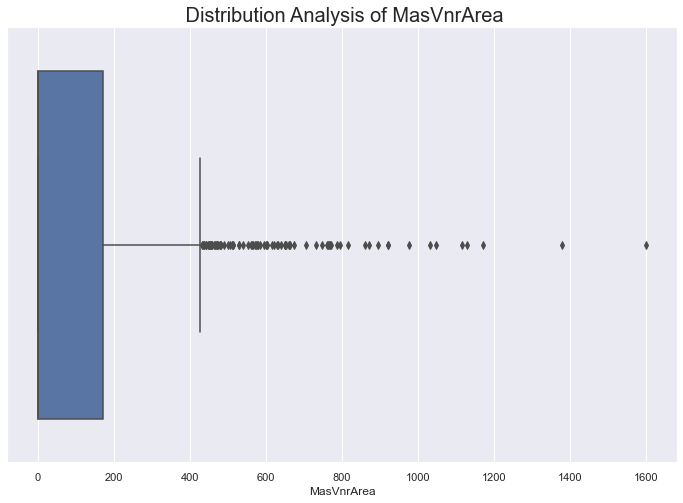

In [321]:
# we have handle the missing values of some variables using mean or median value if it makes sense 
plt.figure(figsize=[12,8])
sns.boxplot(houses['MasVnrArea'])
sns.set(font_scale=1) # font size 2
plt.title(" Distribution Analysis of MasVnrArea" , fontsize=20)
plt.savefig("MasVnrArea_analysis.png",bbox_inches='tight', dpi=300)
plt.show()

In [322]:
# fill it with median
houses['MasVnrArea'].fillna(houses['MasVnrArea'].median() , inplace=True)

In [323]:
houses['LotFrontage'].describe()

count    1127.000000
mean       70.683230
std        24.261598
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

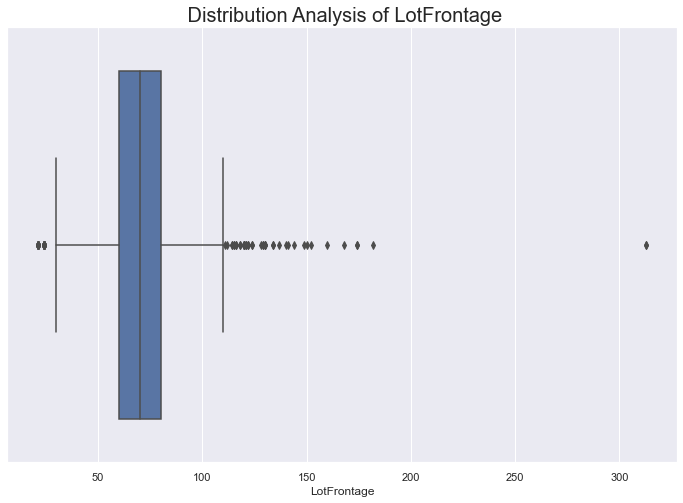

In [324]:
# we have handle the missing values of some variables using mean or median value if it makes sense 
plt.figure(figsize=[12,8])
sns.boxplot(houses['LotFrontage'])
sns.set(font_scale=1) # font size 2
plt.title(" Distribution Analysis of LotFrontage" , fontsize=20)
plt.savefig("LotFrontAge_analysis.png",bbox_inches='tight', dpi=300)
plt.show()

In [325]:
# fill it with median
houses['LotFrontage'].fillna(float(houses['LotFrontage'].median()) , inplace=True)

In [326]:
## Since we have lots of numerical variable , lets check their heatmap correlation with price before planning to include them
non_categorical_columns=houses.select_dtypes(exclude=['object']).columns.tolist()
print (len(non_categorical_columns))
print (non_categorical_columns)

38
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [327]:
## Lets draw heatmap btw different variables and SalePrice to get a view on correlation
corr_columns1=houses[['SalePrice','MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond', 'MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces','GarageArea','GarageCars']]
corr_matrix=corr_columns1.corr()

In [328]:
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

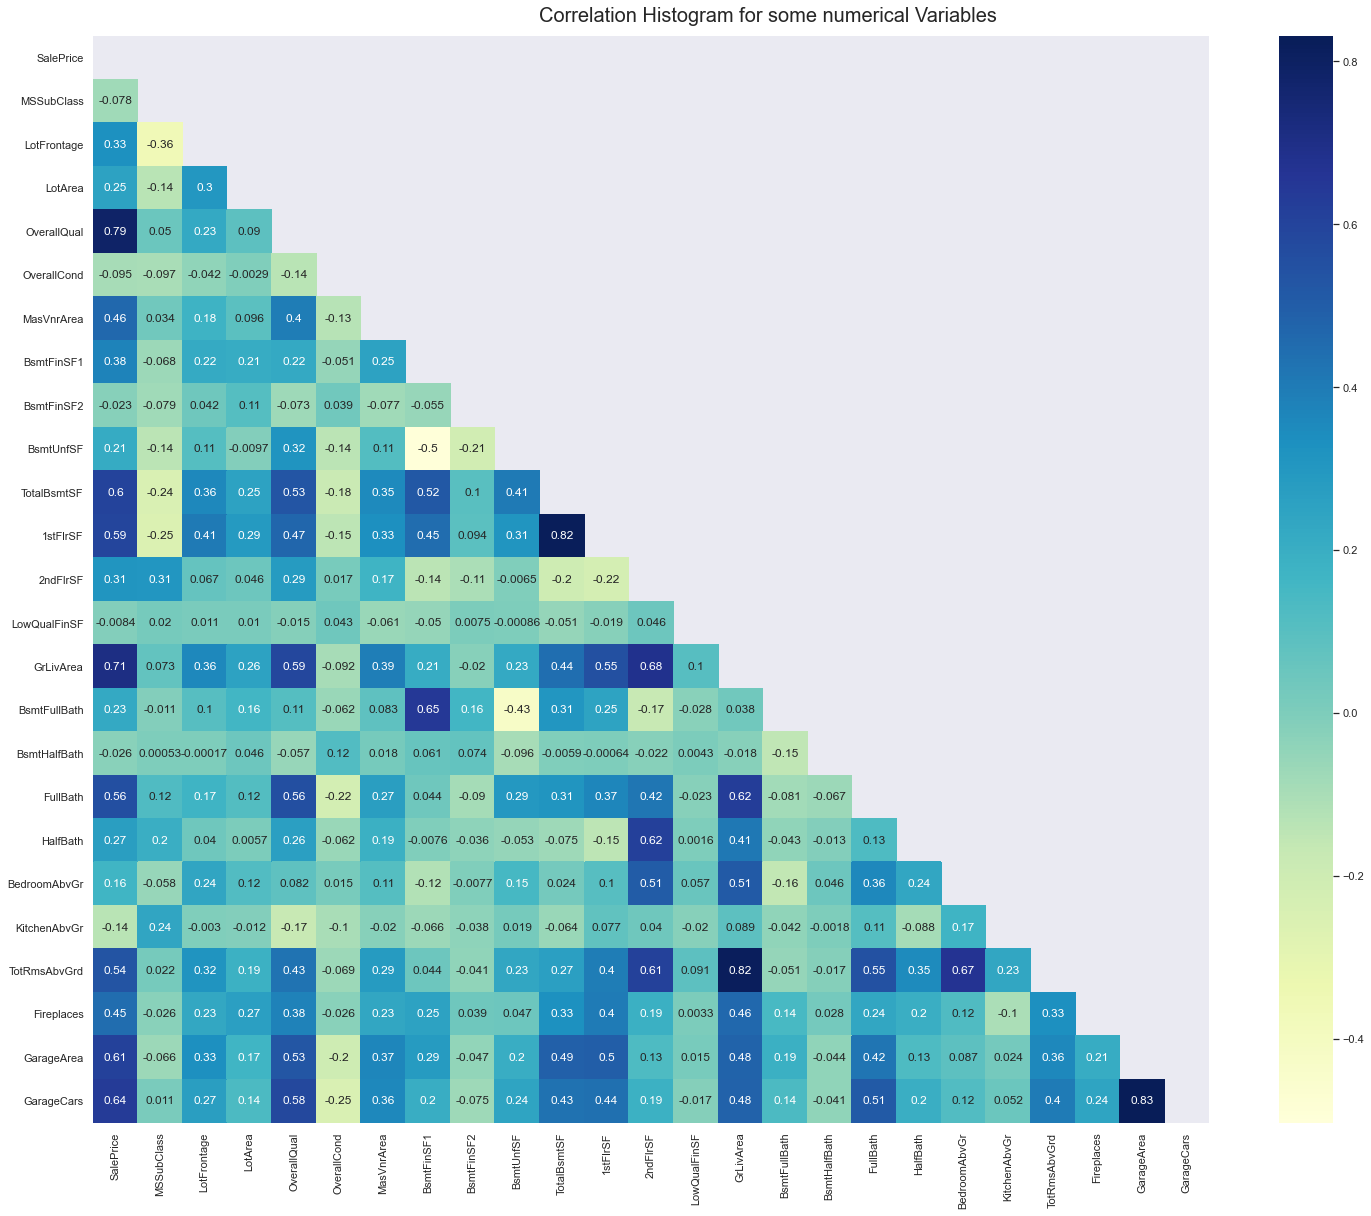

In [329]:
# visualizing the data - with the current used variables
plt.figure(figsize=(25,20))
sns.heatmap(corr_matrix , mask=mask,annot=True , cmap='YlGnBu')
plt.suptitle("Correlation Histogram for some numerical Variables", y=0.9, fontsize=20 ) # y= some height>1 
plt.savefig("./numvariablehistogram1.png",bbox_inches='tight', dpi=300)
plt.show()


In [330]:
corr_matrix['SalePrice'].sort_values()

KitchenAbvGr   -0.135574
OverallCond    -0.095278
MSSubClass     -0.077707
BsmtHalfBath   -0.025651
BsmtFinSF2     -0.023243
LowQualFinSF   -0.008364
BedroomAbvGr    0.164655
BsmtUnfSF       0.213135
BsmtFullBath    0.225988
LotArea         0.252921
HalfBath        0.270721
2ndFlrSF        0.313336
LotFrontage     0.329319
BsmtFinSF1      0.375563
Fireplaces      0.448877
MasVnrArea      0.463139
TotRmsAbvGrd    0.538309
FullBath        0.556550
1stFlrSF        0.594935
TotalBsmtSF     0.603583
GarageArea      0.608405
GarageCars      0.637095
GrLivArea       0.708172
OverallQual     0.787228
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [331]:
## We can easily identify very poorly correlated parameters with SalePrice and drop them  , for eg.. MSSubClass, OverallCond, KitchenAbvGr,BsmtHalfBath,BsmtfinSF2 ,LowQualFinSF, BedroomAbvGr
drop_columns=["KitchenAbvGr","OverallCond","BsmtHalfBath","BsmtFinSF2","LowQualFinSF","BedroomAbvGr"]
# drop the columns needed to be dropped
houses_cleaned=houses.drop(drop_columns,axis=1)

In [332]:
### Notice MSSubclass is not correlated with Saleprice , this may look ok, but MSSubclass is actually a categorical variable , seen as numerical here.
### Lets us convert MSSubclass to categorical !!

In [333]:
houses_cleaned['MSSubClass']=houses_cleaned['MSSubClass'].apply(lambda x: '20' if x == 20 else ('30' if x == 30 else ( '40' if x == 40 else ('45' if x == 45 else ('50' if x == 50 else ('60' if x == 60 else ('70' if x == 70 else ('75' if x == 75 else ('80' if x == 80 else('85' if x == 85 else ('90' if x ==90 else('120' if x== 120 else ('150' if x== 150 else ('160' if x== 160 else('180' if x==180 else('190'))))))))))))))))

In [334]:
## Lets draw heatmap on remaining numerical different variables and SalePrice to get a view on correlation
corr_columns1=houses[['SalePrice','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold']]
corr_matrix=corr_columns1.corr()

In [335]:
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

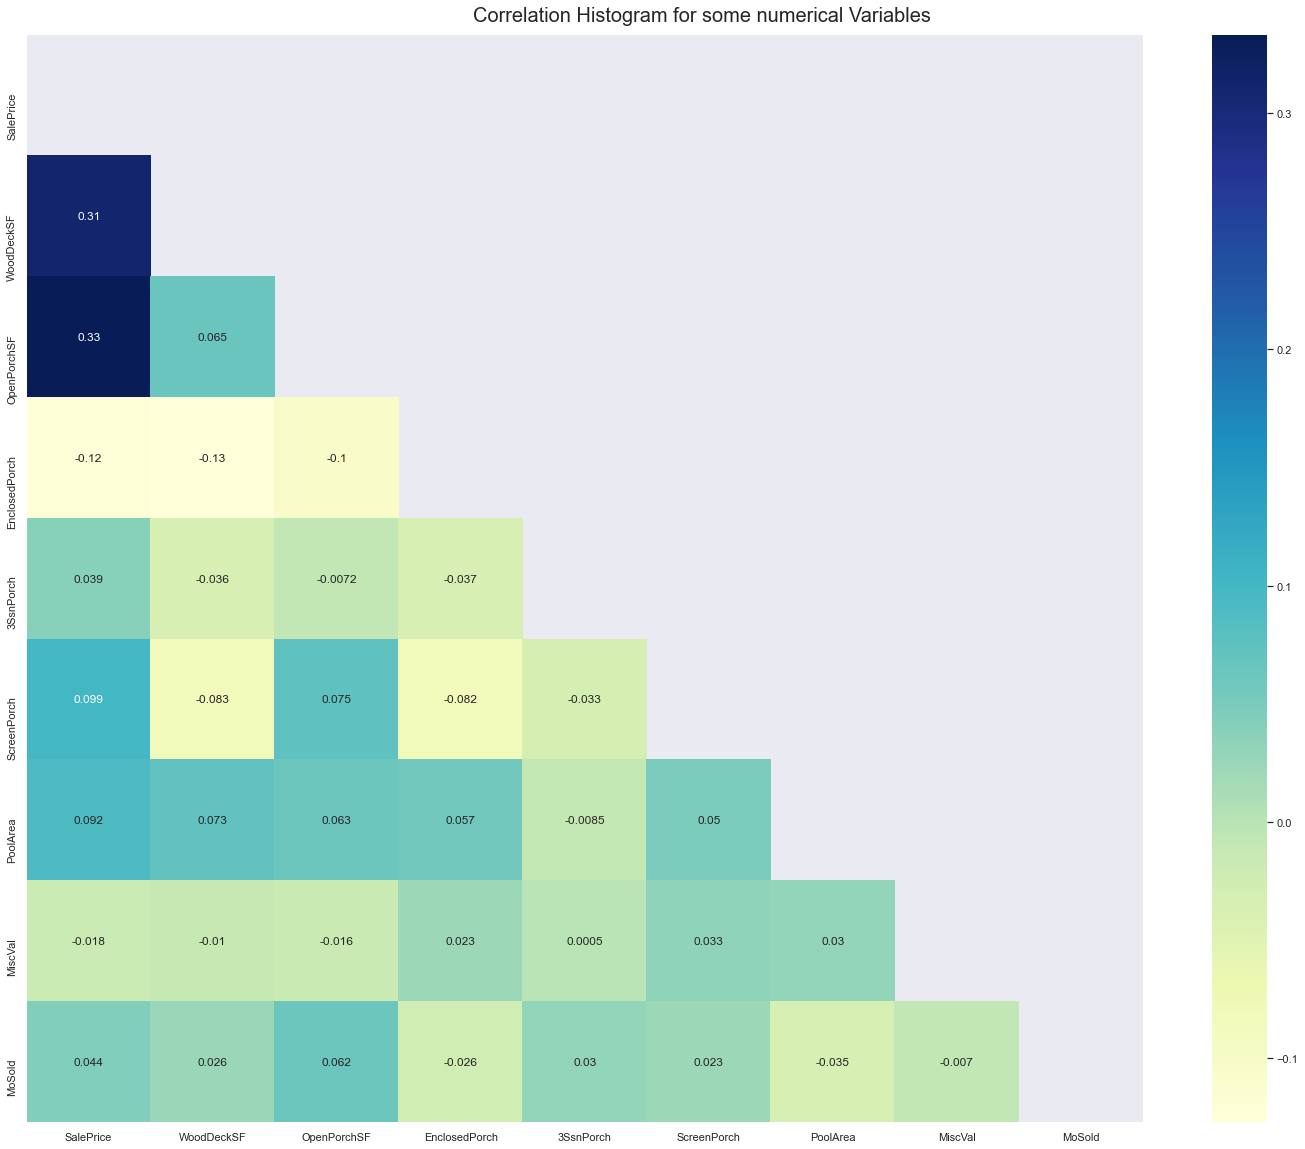

In [336]:
# visualizing the data - with the current used variables
plt.figure(figsize=(25,20))
sns.heatmap(corr_matrix , mask=mask,annot=True , cmap='YlGnBu')
plt.suptitle("Correlation Histogram for some numerical Variables", y=0.9, fontsize=20 ) # y= some height>1 
plt.savefig("./numvariablehistogram1.png",bbox_inches='tight', dpi=300)
plt.show()


In [337]:
corr_matrix['SalePrice'].sort_values()

EnclosedPorch   -0.120164
MiscVal         -0.017933
3SsnPorch        0.039226
MoSold           0.043749
PoolArea         0.091518
ScreenPorch      0.099453
WoodDeckSF       0.312631
OpenPorchSF      0.333036
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [338]:
## We can easily identify very poorly correlated parameters with SalePrice and drop them  , for eg.. MSSubClass, OverallCond, KitchenAbvGr,BsmtHalfBath,BsmtfinSF2 ,LowQualFinSF, BedroomAbvGr
drop_columns=["EnclosedPorch","MiscVal","3SsnPorch","MoSold","PoolArea","ScreenPorch"]
# drop the columns needed to be dropped
houses_cleaned=houses_cleaned.drop(drop_columns,axis=1)


In [339]:
## Since we have lots of categorical variable , lets check them and remove unwanted ones or not yielding any impact to Saleprice , to avoid Encoding all of them.
categorical_columns=houses_cleaned.select_dtypes(include=['object']).columns.tolist()
print (len(categorical_columns))
print (categorical_columns)

44
['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [340]:
houses_cleaned['Utilities'].value_counts()



AllPub    1378
NoSeWa       1
Name: Utilities, dtype: int64

In [341]:
houses_cleaned=houses_cleaned.drop('Utilities',axis=1)

In [342]:
houses_cleaned['Street'].value_counts()
# almost all rows are values as Pave , no use keeping this column.

Pave    1374
Grvl       5
Name: Street, dtype: int64

In [343]:
houses_cleaned=houses_cleaned.drop('Street',axis=1)

In [344]:
houses_cleaned['LandSlope'].value_counts()
# almost all rows are values as Gtl , it makes sense to keep them for analysis further

Gtl    1306
Mod      61
Sev      12
Name: LandSlope, dtype: int64

In [345]:
houses_cleaned=houses_cleaned.drop('LandSlope',axis=1)

In [346]:
houses_cleaned['Condition2'].value_counts()
# almost all rows are values as Norm , lets drop this variable

Norm      1365
Feedr        5
RRNn         2
Artery       2
PosN         2
RRAn         1
PosA         1
RRAe         1
Name: Condition2, dtype: int64

In [347]:
houses_cleaned=houses_cleaned.drop('Condition2',axis=1)

In [348]:
houses_cleaned['RoofMatl'].value_counts()
# almost all rows are values as CompShg , we can drop this column

CompShg    1354
Tar&Grv      10
WdShngl       6
WdShake       5
ClyTile       1
Membran       1
Metal         1
Roll          1
Name: RoofMatl, dtype: int64

In [349]:
houses_cleaned=houses_cleaned.drop('RoofMatl',axis=1)

In [350]:
houses_cleaned['BsmtCond'].value_counts()
# almost all rows are values as TA , we can drop this column

TA             1247
Gd               63
Fa               38
No Basement      30
Po                1
Name: BsmtCond, dtype: int64

In [351]:
houses_cleaned=houses_cleaned.drop('BsmtCond',axis=1)

In [352]:
houses_cleaned['Heating'].value_counts()
# almost all rows are values as GasA , we can drop the column

GasA     1353
GasW       17
Wall        4
Grav        3
OthW        1
Floor       1
Name: Heating, dtype: int64

In [353]:
houses_cleaned=houses_cleaned.drop('Heating',axis=1)

In [354]:
houses_cleaned['CentralAir'].value_counts()
# almost all rows are values as Y , we can drop the column

Y    1310
N      69
Name: CentralAir, dtype: int64

In [355]:
houses_cleaned=houses_cleaned.drop('CentralAir',axis=1)

In [356]:
houses_cleaned['Electrical'].value_counts()
# almost all rows are values as SBrkr , we can drop the column

SBrkr    1272
FuseA      81
FuseF      22
FuseP       2
Mix         1
Name: Electrical, dtype: int64

In [357]:
houses_cleaned=houses_cleaned.drop('Electrical',axis=1)

In [358]:
houses_cleaned['Functional'].value_counts()
# almost all rows are values as Typ , lets drop this columns

Typ     1287
Min2      32
Min1      31
Mod       13
Maj1      11
Maj2       4
Sev        1
Name: Functional, dtype: int64

In [359]:
houses_cleaned=houses_cleaned.drop('Functional',axis=1)

In [360]:
houses_cleaned['GarageQual'].value_counts()
# almost all rows are values as TA , lets drop this columns

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [361]:
houses_cleaned=houses_cleaned.drop('GarageQual',axis=1)

In [362]:
houses_cleaned['GarageCond'].value_counts()
# almost all rows are values as TA , lets drop this columns

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [363]:
houses_cleaned=houses_cleaned.drop('GarageCond',axis=1)

In [364]:
houses_cleaned['PavedDrive'].value_counts()
# almost all rows are values as Y , lets drop this columns

Y    1293
N      58
P      28
Name: PavedDrive, dtype: int64

In [365]:
houses_cleaned=houses_cleaned.drop('PavedDrive',axis=1)

In [366]:
houses_cleaned['PoolQC'].value_counts()
# almost all rows are values as No Pool , lets drop this columns

No Pool    1372
Gd            3
Ex            2
Fa            2
Name: PoolQC, dtype: int64

In [367]:
houses_cleaned=houses_cleaned.drop('PoolQC',axis=1)

In [368]:
houses_cleaned['MiscFeature'].value_counts()
# almost all rows are values as None , lets drop this columns

None    1328
Shed      47
Gar2       2
Othr       1
TenC       1
Name: MiscFeature, dtype: int64

In [369]:
houses_cleaned=houses_cleaned.drop('MiscFeature',axis=1)

In [370]:
# Lets also drop Id column , it has no use
houses_cleaned=houses_cleaned.drop('Id',axis=1)
houses_temp=houses_cleaned

In [371]:
## Since we have lots of categorical variable , lets check them now before Encoding all of them.
houses_cleaned=houses_temp
categorical_columns=houses_cleaned.select_dtypes(include=['object']).columns.tolist()
print (len(categorical_columns))
print (categorical_columns)

29
['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Fence', 'SaleType', 'SaleCondition']


In [372]:
## Since we have lots of numerical variable , lets check them now before Encoding all of them.
non_categorical_columns=houses_cleaned.select_dtypes(exclude=['object']).columns.tolist()
print (len(non_categorical_columns))
print (non_categorical_columns)

24
['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'YrSold', 'SalePrice']


### Checking Outliers

In [373]:
count=0
def detect_outliers_iqr(data):
    #data = data.sort_values
    global count
    UB_outliers = []
    LB_outliers = []
    q1 = np.quantile(data, 0.25)
    q3 = np.quantile(data, 0.75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound):
            LB_outliers.append(i)
            count=count+1
        if (i > upr_bound):
            UB_outliers.append(i)
            count=count+1           
    return UB_outliers,LB_outliers # Driver code



for i in non_categorical_columns:
    UB_outliers,LB_outliers = detect_outliers_iqr(houses_cleaned[i])
    print("Outliers from IQR method - above fence for ",i, " are:" ,UB_outliers,"\n")
    print ("number of Outliers above fence for ",i, "are:", len(UB_outliers),"\n")
    print("Outliers from IQR method - below fence for ",i, " are:" ,LB_outliers, "\n")
    print ("number of Outliers below fence for ",i, "are:", len(LB_outliers),"\n")    
    print("*******************************************************************************************************************************************")



print ("The number of outlier rows in total for all columns are: ",count,"\n")

    ### There are lot of outliers almost 650 rows out of 14, it would be logical to remove those rows But this is a big lot and We may drop some of these columns all together , 
    ### so it is a risk to remove so many columns , we can either increase the limits for fence to remove outliers or try same !

    


Outliers from IQR method - above fence for  LotFrontage  are: [110.0, 108.0, 112.0, 115.0, 110.0, 121.0, 122.0, 120.0, 134.0, 110.0, 141.0, 174.0, 174.0, 120.0, 129.0, 140.0, 120.0, 118.0, 116.0, 150.0, 111.0, 109.0, 130.0, 137.0, 110.0, 130.0, 120.0, 110.0, 110.0, 144.0, 114.0, 128.0, 116.0, 149.0, 313.0, 122.0, 130.0, 121.0, 115.0, 120.0, 114.0, 168.0, 182.0, 134.0, 109.0, 120.0, 118.0, 160.0, 152.0, 124.0, 313.0, 108.0, 108.0, 120.0, 129.0, 124.0] 

number of Outliers above fence for  LotFrontage are: 56 

Outliers from IQR method - below fence for  LotFrontage  are: [24.0, 21.0, 24.0, 24.0, 24.0, 21.0, 21.0, 21.0, 21.0, 30.0, 21.0, 21.0, 24.0, 21.0, 21.0, 24.0, 24.0, 30.0, 21.0, 24.0, 24.0, 30.0, 24.0, 30.0, 21.0, 30.0, 21.0, 24.0, 24.0, 24.0, 21.0, 21.0, 21.0, 24.0, 24.0, 24.0, 24.0, 24.0, 21.0, 24.0, 30.0, 21.0] 

number of Outliers below fence for  LotFrontage are: 42 

**************************************************************************************************************

In [374]:
## number of rows before removing Outliers 
print (len(houses_cleaned))

1379


In [375]:
houses_outlierremoved=houses_cleaned
for i in non_categorical_columns:
    UB_outliers,LB_outliers = detect_outliers_iqr(houses_cleaned[i])
    if len(UB_outliers):
        UB_outliers.sort()
        minimum_UB_value=float(str(UB_outliers[:1])[1:-1])
        houses_outlierremoved=houses_outlierremoved[houses_outlierremoved[i] < minimum_UB_value]
    if len(LB_outliers):
        houses_outlierremoved=houses_outlierremoved[houses_outlierremoved[i] > max(LB_outliers)]


In [376]:
# number of rows after outliers removed.
print (len(houses_outlierremoved))

990


### 4. Data Preparation
Encoding the categorical variables.

In [377]:
houses_cleaned=houses_outlierremoved
houses_updated=houses_cleaned
for i in categorical_columns:
    encoding=pd.get_dummies(houses_cleaned[i],prefix=i,drop_first=True)
    # concatentate the 2 data sets now
    houses_updated=pd.concat([houses_updated,encoding],axis=1)
    houses_updated=houses_updated.drop(i,axis=1)

### 1st level RFE based selection , due to too many parameters especailly categorical

In [378]:
# We can do data transformation encoding for all cataegorical variables and then select the features or do RFE first and do encoding only on selected features.
# Lets do RFE first
    ## train-test 70-30 split
houses_train, houses_test = train_test_split(houses_updated, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 90)

# rescale the features
scaler = MinMaxScaler()

# apply scaler() to all the numeric columns 
numeric_vars = houses_updated.select_dtypes(include=np.number).columns.tolist()
houses_train[numeric_vars] = scaler.fit_transform(houses_train[numeric_vars])
houses_train.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
787,0.586667,0.522719,0.625,0.957983,0.900000,0.000000,0.408468,0.178571,0.437975,0.301163,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
273,0.640000,0.488033,0.500,0.571429,0.633333,0.435714,0.386052,0.000000,0.617722,0.694186,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1126,0.280000,0.109433,0.625,0.983193,0.950000,0.309524,0.000000,0.817262,0.701899,0.649419,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
29,0.373333,0.278382,0.250,0.310924,0.000000,0.000000,0.000000,0.309524,0.162025,0.047674,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1099,0.666667,0.633943,0.625,0.739496,0.466667,0.490476,0.438356,0.337500,0.637342,0.676163,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [379]:
# divide into X_train, y_train, X_test, y_test
y_train = houses_train.pop('SalePrice')
X_train = houses_train

y_test = houses_test.pop('SalePrice')
X_test = houses_test

In [380]:
# now we have 193 feature variables , To build the model using RFE, we need to tell RFE how many features we want in the final model. It then runs a feature elimination algorithm.

# Note that the number of features to be used in the model is a hyperparameter
# first model with an arbitrary choice of n_features
# running RFE with number of features=40

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=40)             
rfe = rfe.fit(X_train, y_train)

In [381]:
# tuples of (feature name, whether selected, ranking)
# note that the 'rank' is > 1 for non-selected features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 42),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 16),
 ('MasVnrArea', False, 119),
 ('BsmtFinSF1', False, 117),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 62),
 ('2ndFlrSF', False, 81),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 103),
 ('FullBath', False, 114),
 ('HalfBath', False, 144),
 ('TotRmsAbvGrd', False, 40),
 ('Fireplaces', False, 93),
 ('GarageYrBlt', False, 105),
 ('GarageCars', False, 68),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 72),
 ('OpenPorchSF', False, 108),
 ('YrSold', False, 125),
 ('MSSubClass_160', True, 1),
 ('MSSubClass_180', False, 15),
 ('MSSubClass_190', True, 1),
 ('MSSubClass_20', False, 33),
 ('MSSubClass_30', False, 34),
 ('MSSubClass_40', False, 127),
 ('MSSubClass_45', False, 88),
 ('MSSubClass_50', False, 29),
 ('MSSubClass_60', False, 32),
 ('MSSubClass_70', False, 28),
 ('MSSubClass_75', False, 31),
 ('MSSubClass_80', True, 1),

In [382]:
# predict prices of X_train
y_train_pred = rfe.predict(X_train)

# evaluate the model on train and test set
r2 = r2_score(y_train, y_train_pred)
print(r2)

0.9104860537068006


In [383]:
## Lets drop columns with all false and also in particular if few of the categorical variables are flse , lets drop whole variable itself.
drop_columns=["LotFrontage","BsmtFullBath","FullBath","HalfBath","Fireplaces","GrLivArea","MasVnrArea","TotRmsAbvGrd","GarageCars","GarageYrBlt","WoodDeckSF","BsmtFinSF1","YrSold","Alley","LotConfig","LotShape","Condition1","HouseStyle","Exterior1st","Exterior2nd","BsmtFinType1","BsmtFinType2","MasVnrType","ExterQual","FireplaceQu","GarageFinish","GarageType","Fence"]
# drop the columns needed to be dropped
houses_cleaned=houses_cleaned.drop(drop_columns,axis=1)
houses_temp=houses_cleaned

In [384]:
## Since we have lots of categorical variable , lets check them now before Encoding all of them.
categorical_columns=houses_cleaned.select_dtypes(include=['object']).columns.tolist()
print (len(categorical_columns))
print (categorical_columns)

14
['MSSubClass', 'MSZoning', 'LandContour', 'Neighborhood', 'BldgType', 'RoofStyle', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'HeatingQC', 'KitchenQual', 'SaleType', 'SaleCondition']


In [385]:
houses_updated=houses_cleaned
for i in categorical_columns:
    encoding=pd.get_dummies(houses_cleaned[i],prefix=i,drop_first=True)
    # concatentate the 2 data sets now
    houses_updated=pd.concat([houses_updated,encoding],axis=1)
    houses_updated=houses_updated.drop(i,axis=1)

In [386]:
# We can do data transformation encoding for all cataegorical variables and then select the features or do RFE first and do encoding only on selected features.
# Lets do RFE first
    ## train-test 70-30 split
houses_train, houses_test = train_test_split(houses_updated, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 90)

# rescale the features
scaler = MinMaxScaler()

# apply scaler() to all the numeric columns 
numeric_vars = houses_updated.select_dtypes(include=np.number).columns.tolist()
houses_train[numeric_vars] = scaler.fit_transform(houses_train[numeric_vars])

In [387]:
# divide into X_train, y_train, X_test, y_test
y_train = houses_train.pop('SalePrice')
X_train = houses_train


In [388]:
# we will start of with stats model library
import statsmodels.api as sm

In [389]:
# add constant
X_train_sm= sm.add_constant(X_train)
X_train_sm.head()

,const,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GarageArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
787,1.0,0.522719,0.625,0.957983,0.900000,0.178571,0.437975,0.301163,0.700186,0.644163,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
273,1.0,0.488033,0.500,0.571429,0.633333,0.000000,0.617722,0.694186,0.000000,0.250352,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1126,1.0,0.109433,0.625,0.983193,0.950000,0.817262,0.701899,0.649419,0.000000,0.703235,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
29,1.0,0.278382,0.250,0.310924,0.000000,0.309524,0.162025,0.047674,0.000000,0.112518,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1099,1.0,0.633943,0.625,0.739496,0.466667,0.337500,0.637342,0.676163,0.000000,0.447257,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Model creation using SM OLS and removing parameters using P value and VIF !

In [390]:
# create 2nd model 
lr = sm.OLS(y_train , X_train_sm)

# fit the model
model = lr.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     79.57
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          6.08e-280
Time:                        15:08:32   Log-Likelihood:                 1109.7
No. Observations:                 693   AIC:                            -2039.
Df Residuals:                     603   BIC:                            -1631.
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0454      0.051      0.885      0.376      -0.055       0.146
LotArea                      0.0495      0.017      2.986      0.003       0.017       0.082
OverallQual                  0.2352      0.026      9.092      0.000       0.184       0.286
YearBuilt                    0.1229      0.032      3.811      0.000       0.060       0.186
YearRemodAdd                 0.0458      0.010      4.710      0.000       0.027       0.065
BsmtUnfSF                   -0.0982      0.011     -9.188      0.000      -0.119      -0.077
TotalBsmtSF                  0.1661      0.027      6.168      0.000       0.113       0.219
1stFlrSF                     0.2540      0.027      9.333      0.000       0.201       0.307
2ndFlrSF                     0.2873      0.025     11.447      0.000       0.238       0.337
GarageArea                   0.0694      0.013      5.147      0.000       0.043       0.096
OpenPorchSF                  0.0097      0.010      0.933      0.351      -0.011       0.030
MSSubClass_160              -0.0686      0.028     -2.439      0.015      -0.124      -0.013
MSSubClass_180              -0.0411      0.044     -0.928      0.354      -0.128       0.046
MSSubClass_190              -0.0851      0.032     -2.673      0.008      -0.148      -0.023
MSSubClass_20               -0.0774      0.060     -1.293      0.197      -0.195       0.040
MSSubClass_30               -0.0773      0.062     -1.250      0.212      -0.199       0.044
MSSubClass_40               -0.0339      0.071     -0.476      0.634      -0.174       0.106
MSSubClass_45               -0.0565      0.066     -0.855      0.393      -0.186       0.073
MSSubClass_50               -0.1000      0.061     -1.633      0.103      -0.220       0.020
MSSubClass_60               -0.0914      0.062     -1.481      0.139      -0.213       0.030
MSSubClass_70               -0.1124      0.063     -1.786      0.075      -0.236       0.011
MSSubClass_75               -0.0970      0.067     -1.452      0.147      -0.228       0.034
MSSubClass_80               -0.0990      0.061     -1.630      0.104      -0.218       0.020
MSSubClass_85               -0.1054      0.062     -1.695      0.091      -0.228       0.017
MSSubClass_90               -0.0853      0.031     -2.738      0.006      -0.146      -0.024
MSZoning_FV                  0.0976      0.039      2.501      0.013       0.021       0.174
MSZoning_RH                  0.1529      0.038      4.055      0.000       0.079       0.227
MSZoning_RL                  0.1304      0.031      4.217      0.000       0.070       0.191
MSZoning_RM                  0.1097      0.029      3.810      0.000       0.053       0.166
LandContour_HLS             -0.0019      0.019     -0.097      0.922      -0.040       0.036
LandContour_Lo

#### Lets check the multi colinearity among variables before we decide drop any variable.

### lets compute VIF
#### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

#### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [391]:
# import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [392]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
57,RoofStyle_Gable,inf
60,RoofStyle_Mansard,inf
54,BldgType_Duplex,inf
58,RoofStyle_Gambrel,inf
61,ExterCond_Fa,inf
62,ExterCond_Gd,inf
63,ExterCond_TA,inf
53,BldgType_2fmCon,inf
23,MSSubClass_90,inf
12,MSSubClass_190,inf


### There is perfect correlation btw some components hence high or Infiinite VIF ,  lets drop variables with high P value first 

In [393]:
# Some of the categorical vairables have high P value , lets drop the variable if some of them have high p value 
# Lets drop columns with all false and also in particular if few of the categorical variables are flse , lets drop whole variable itself.
houses_cleaned=houses_temp
drop_columns=["LandContour","MSSubClass","SaleType","ExterCond","RoofStyle","BsmtExposure"]
# drop the columns needed to be dropped
houses_cleaned=houses_cleaned.drop(drop_columns,axis=1)
## Since we have lots of categorical variable , lets check them now before Encoding all of them.
categorical_columns=houses_cleaned.select_dtypes(include=['object']).columns.tolist()
houses_temp=houses_cleaned
houses_updated=houses_cleaned
for i in categorical_columns:
    encoding=pd.get_dummies(houses_cleaned[i],prefix=i,drop_first=True)
    # concatentate the 2 data sets now
    houses_updated=pd.concat([houses_updated,encoding],axis=1)
    houses_updated=houses_updated.drop(i,axis=1)

# We can do data transformation encoding for all cataegorical variables and then select the features or do RFE first and do encoding only on selected features.
# Lets do RFE first
    ## train-test 70-30 split
houses_train, houses_test = train_test_split(houses_updated, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 90)

# rescale the features
scaler = MinMaxScaler()

# apply scaler() to all the numeric columns 
numeric_vars = houses_updated.select_dtypes(include=np.number).columns.tolist()
houses_train[numeric_vars] = scaler.fit_transform(houses_train[numeric_vars])

# divide into X_train, y_train, X_test, y_test
y_train = houses_train.pop('SalePrice')
X_train = houses_train


# add constant
X_train_sm= sm.add_constant(X_train)
X_train_sm.head()

# create 2nd model 
lr = sm.OLS(y_train , X_train_sm)

# fit the model
model = lr.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     115.8
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          4.31e-298
Time:                        15:08:33   Log-Likelihood:                 1076.9
No. Observations:                 693   AIC:                            -2036.
Df Residuals:                     634   BIC:                            -1768.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0488      0.051     -0.962      0.336      -0.148       0.051
LotArea                   0.0518      0.016      3.169      0.002       0.020       0.084
OverallQual               0.2509      0.025      9.972      0.000       0.202       0.300
YearBuilt                 0.1452      0.027      5.384      0.000       0.092       0.198
YearRemodAdd              0.0434      0.010      4.528      0.000       0.025       0.062
BsmtUnfSF                -0.1116      0.010    -10.779      0.000      -0.132      -0.091
TotalBsmtSF               0.1815      0.024      7.436      0.000       0.134       0.229
1stFlrSF                  0.2607      0.025     10.447      0.000       0.212       0.310
2ndFlrSF                  0.2539      0.013     19.318      0.000       0.228       0.280
GarageArea                0.0672      0.013      5.066      0.000       0.041       0.093
OpenPorchSF               0.0079      0.010      0.784      0.433      -0.012       0.028
MSZoning_FV               0.0665      0.038      1.738      0.083      -0.009       0.142
MSZoning_RH               0.1293      0.038      3.441      0.001       0.055       0.203
MSZoning_RL               0.1091      0.030      3.602      0.000       0.050       0.169
MSZoning_RM               0.0954      0.028      3.389      0.001       0.040       0.151
Neighborhood_BrkSide      0.0469      0.028      1.687      0.092      -0.008       0.101
Neighborhood_ClearCr     -0.0023      0.029     -0.080      0.936      -0.060       0.055
Neighborhood_CollgCr     -0.0434      0.020     -2.155      0.032      -0.083      -0.004
Neighborhood_Crawfor      0.1035      0.026      3.948      0.000       0.052       0.155
Neighborhood_Edwards     -0.0274      0.023     -1.187      0.236      -0.073       0.018
Neighborhood_Gilbert     -0.0442      0.021     -2.057      0.040      -0.086      -0.002
Neighborhood_IDOTRR       0.0161      0.035      0.465      0.642      -0.052       0.084
Neighborhood_MeadowV     -0.0469      0.032     -1.449      0.148      -0.110       0.017
Neighborhood_Mitchel     -0.0396      0.024     -1.645      0.101      -0.087       0.008
Neighborhood_NAmes       -0.0174      0.022     -0.777      0.437      -0.061       0.026
Neighborhood_NPkVill     -0.0107      0.036     -0.296      0.768      -0.082       0.060
Neighborhood_NWAmes      -0.0401      0.022     -1.784      0.075      -0.084       0.004
Neighborhood_NoRidge      0.0267      0.025      1.053      0.293      -0.023       0.076
Neighborhood_NridgHt      0.0342      0.021      1.646      0.100      -0.007       0.075
Neighborhood_OldTown     -0.0142      0.029     -0.484      0.629      -0.072       0.043
Neighborhood_SWISU        0.0021      0.027      0.079      0.937      -0.051       0.056
Neighborhood_Sawyer    

In [394]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,MSZoning_RL,114.14
2,YearBuilt,77.79
1,OverallQual,40.78
5,TotalBsmtSF,38.16
6,1stFlrSF,27.32
46,BsmtQual_TA,24.67
53,KitchenQual_TA,23.37
52,KitchenQual_Gd,17.80
45,BsmtQual_Gd,17.41
13,MSZoning_RM,17.31


In [395]:
### P value of the the parameter is under control for numeric variables, for catgorical , it is mixed , 
#but still VIF is high for few parameters  ,  lets drop variables with high VIF 

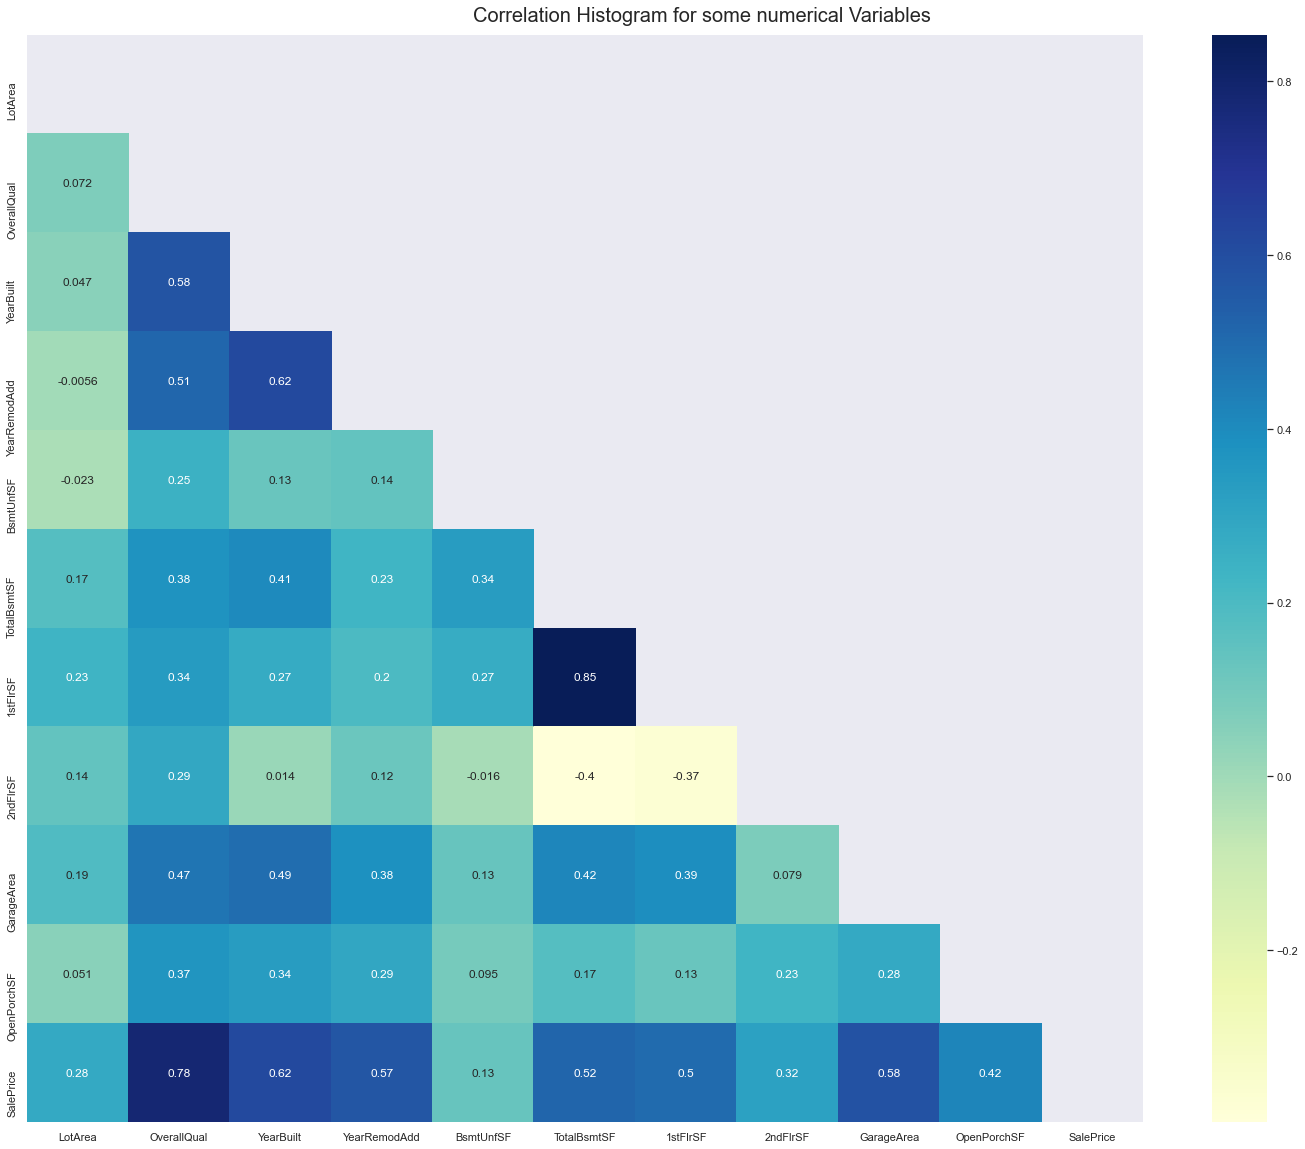

In [396]:
### Lets check the Correlation between existing variables.
corr_matrix=houses_cleaned.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
# visualizing the data - with the current used variables
plt.figure(figsize=(25,20))
sns.heatmap(corr_matrix , mask=mask,annot=True , cmap='YlGnBu')
plt.suptitle("Correlation Histogram for some numerical Variables", y=0.9, fontsize=20 ) # y= some height>1 
plt.savefig("./numvariablehistogram1.png",bbox_inches='tight', dpi=300)
plt.show()

### Based on above heatmap 
- 1stFlrSF and TotalBsmtSF are highly correlated , only one of them has to be kept.
- Year built and Year remoteAdd are highly correlated , only one of them has to be kept. Lets keep YearBuilt , it is more correlated to sale price.


In [397]:
# Some of the categorical vairables have high P value , lets drop the variable if some of them have high p value 
# Lets drop columns with all false and also in particular if few of the categorical variables are flse , lets drop whole variable itself.
houses_cleaned=houses_temp
drop_columns=["1stFlrSF","YearRemodAdd"]
# drop the columns needed to be dropped
houses_cleaned=houses_cleaned.drop(drop_columns,axis=1)
## Since we have lots of categorical variable , lets check them now before Encoding all of them.
categorical_columns=houses_cleaned.select_dtypes(include=['object']).columns.tolist()
houses_updated=houses_cleaned
houses_temp=houses_cleaned
for i in categorical_columns:
    encoding=pd.get_dummies(houses_cleaned[i],prefix=i,drop_first=True)
    # concatentate the 2 data sets now
    houses_updated=pd.concat([houses_updated,encoding],axis=1)
    houses_updated=houses_updated.drop(i,axis=1)

# We can do data transformation encoding for all cataegorical variables and then select the features or do RFE first and do encoding only on selected features.
# Lets do RFE first
    ## train-test 70-30 split
houses_train, houses_test = train_test_split(houses_updated, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 90)

# rescale the features
scaler = MinMaxScaler()

# apply scaler() to all the numeric columns 
numeric_vars = houses_updated.select_dtypes(include=np.number).columns.tolist()
houses_train[numeric_vars] = scaler.fit_transform(houses_train[numeric_vars])

# divide into X_train, y_train, X_test, y_test
y_train = houses_train.pop('SalePrice')
X_train = houses_train

# add constant
X_train_sm= sm.add_constant(X_train)
X_train_sm.head()


# create 2nd model 
lr = sm.OLS(y_train , X_train_sm)

# fit the model
model = lr.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     96.15
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          2.03e-272
Time:                        15:08:38   Log-Likelihood:                 1006.6
No. Observations:                 693   AIC:                            -1899.
Df Residuals:                     636   BIC:                            -1640.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0055      0.055      0.100      0.920      -0.103       0.115
LotArea                   0.0753      0.018      4.210      0.000       0.040       0.110
OverallQual               0.3007      0.027     10.999      0.000       0.247       0.354
YearBuilt                 0.1191      0.030      4.037      0.000       0.061       0.177
BsmtUnfSF                -0.1110      0.011     -9.707      0.000      -0.133      -0.089
TotalBsmtSF               0.3523      0.020     18.062      0.000       0.314       0.391
2ndFlrSF                  0.2318      0.014     16.144      0.000       0.204       0.260
GarageArea                0.0927      0.014      6.413      0.000       0.064       0.121
OpenPorchSF               0.0150      0.011      1.354      0.176      -0.007       0.037
MSZoning_FV               0.0463      0.042      1.095      0.274      -0.037       0.129
MSZoning_RH               0.1070      0.041      2.581      0.010       0.026       0.188
MSZoning_RL               0.0935      0.033      2.794      0.005       0.028       0.159
MSZoning_RM               0.0922      0.031      2.963      0.003       0.031       0.153
Neighborhood_BrkSide      0.0126      0.031      0.413      0.680      -0.047       0.073
Neighborhood_ClearCr     -0.0359      0.032     -1.113      0.266      -0.099       0.027
Neighborhood_CollgCr     -0.0744      0.022     -3.377      0.001      -0.118      -0.031
Neighborhood_Crawfor      0.0801      0.029      2.773      0.006       0.023       0.137
Neighborhood_Edwards     -0.0488      0.025     -1.917      0.056      -0.099       0.001
Neighborhood_Gilbert     -0.0648      0.024     -2.741      0.006      -0.111      -0.018
Neighborhood_IDOTRR      -0.0390      0.038     -1.032      0.302      -0.113       0.035
Neighborhood_MeadowV     -0.0760      0.036     -2.135      0.033      -0.146      -0.006
Neighborhood_Mitchel     -0.0674      0.026     -2.549      0.011      -0.119      -0.015
Neighborhood_NAmes       -0.0463      0.025     -1.889      0.059      -0.094       0.002
Neighborhood_NPkVill     -0.0433      0.040     -1.087      0.277      -0.121       0.035
Neighborhood_NWAmes      -0.0522      0.025     -2.107      0.035      -0.101      -0.004
Neighborhood_NoRidge     -0.0036      0.028     -0.130      0.896      -0.058       0.051
Neighborhood_NridgHt      0.0075      0.023      0.329      0.742      -0.037       0.052
Neighborhood_OldTown     -0.0556      0.032     -1.732      0.084      -0.119       0.007
Neighborhood_SWISU       -0.0120      0.030     -0.398      0.690      -0.071       0.047
Neighborhood_Sawyer      -0.0380      0.026     -1.489      0.137      -0.088       0.012
Neighborhood_SawyerW     -0.0569      0.024     -2.404      0.016      -0.103      -0.010
Neighborhood_Somerst   

In [398]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,MSZoning_RL,113.32
2,YearBuilt,75.16
1,OverallQual,39.27
44,BsmtQual_TA,24.64
51,KitchenQual_TA,22.87
4,TotalBsmtSF,19.69
50,KitchenQual_Gd,17.72
43,BsmtQual_Gd,17.39
11,MSZoning_RM,17.15
0,LotArea,15.83


### Finally this seems to be decent model with good r2 squared , all good p values and some higher VIF due to categorical variables influencing each other.

In [399]:
y_train_pred = model.predict(X_train_sm)

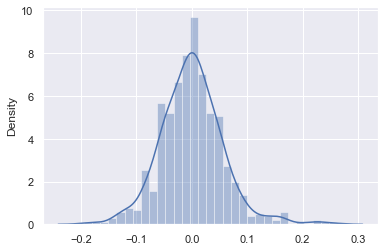

In [400]:
residual= y_train - y_train_pred
sns.distplot(residual)
plt.savefig("./residualdisplot.png",bbox_inches='tight', dpi=300)
plt.show()

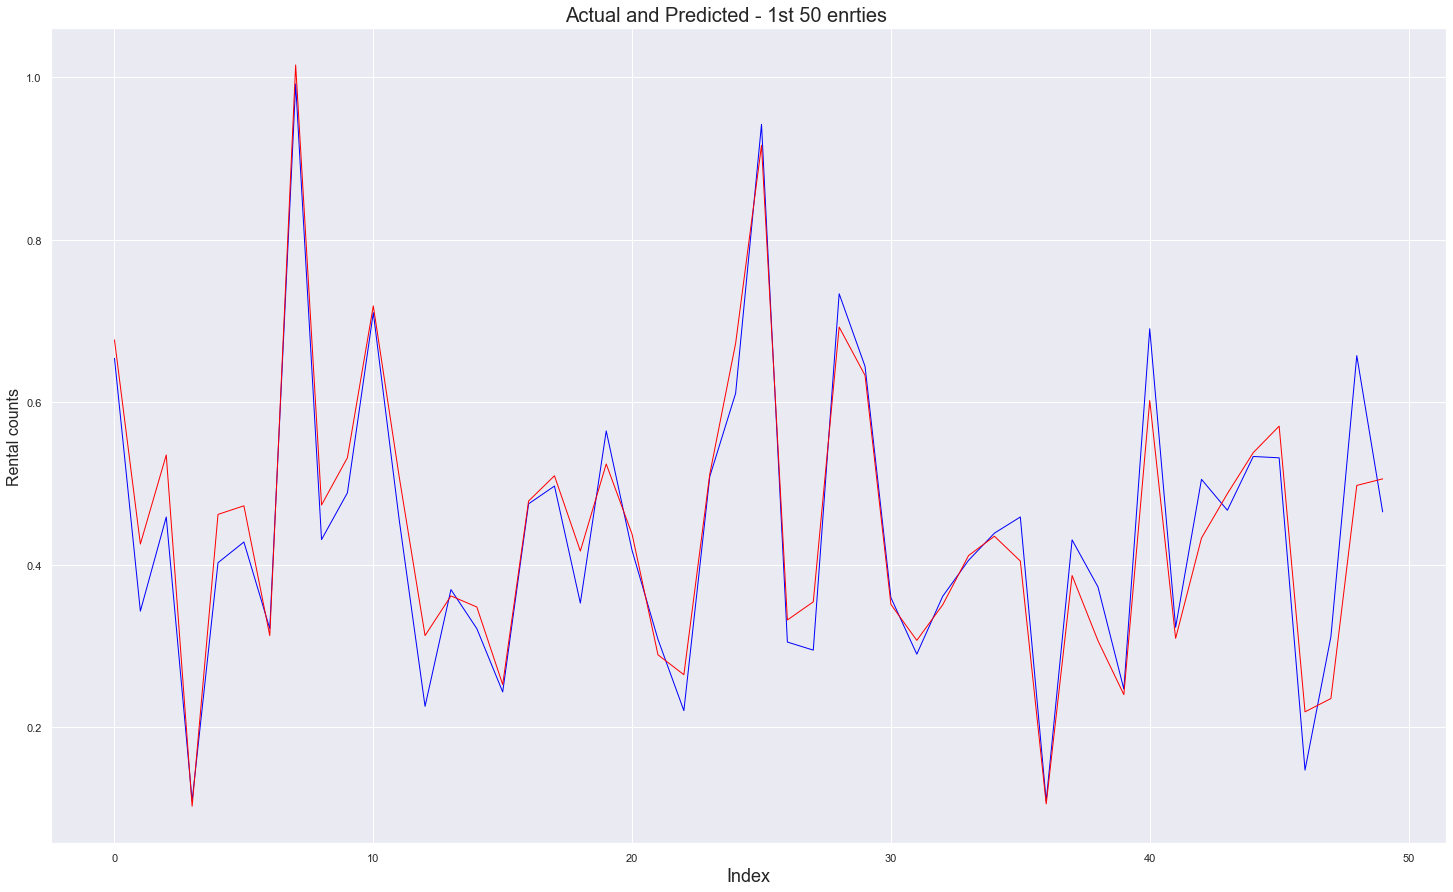

In [401]:


#Actual vs Predicted
c = [i for i in range(0,50,1)]
fig = plt.figure(figsize=(25,15))
plt.plot(c,y_train.iloc[:50], color="blue", linewidth=1, linestyle="-")
plt.plot(c,y_train_pred.iloc[:50], color="red",  linewidth=1, linestyle="-")
fig.suptitle('Actual and Predicted - 1st 50 enrties',y=0.9, fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Rental counts', fontsize=16)                               # Y-label
plt.savefig("./actualpredicted1.png",bbox_inches='tight', dpi=300)
plt.show()

## Lets check the R squared on the test set

In [402]:
# we need to prepare test data set also same way as training data set
# we only transform the test data set and not FIT finding xmax and xmin of test data set.
numeric_vars = houses_test.select_dtypes(include=np.number).columns.tolist()
X_test=houses_test
X_test[numeric_vars]=scaler.transform(X_test[numeric_vars])

In [403]:
Y_test = X_test.pop('SalePrice')

In [404]:

X_test_sm = sm.add_constant(X_test)

In [405]:

# predict y test pred
y_test_pred = model.predict(X_test_sm)
test_residual=y_test - y_test_pred

In [406]:
r2score = r2_score(y_true=Y_test , y_pred = y_test_pred)
r2score

0.8356373885618563

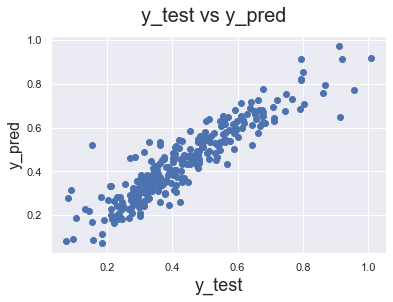

In [407]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(Y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.savefig("./errordist1.png",bbox_inches='tight', dpi=300)

In [408]:
y_pred_train = model.predict(X_train_sm)
y_pred_test = model.predict(X_test_sm)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(Y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(Y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(Y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8943561264027908
0.8356373885618563
2.2213206514687833
1.3928987430375832
0.00320536890543836
0.0046898947577023


### Before we apply regularization , we can do one more round of grid search CV and reduce parameters

### Cross-Validation in sklearn

Let's now experiment with k-fold CV.

In [409]:
# k-fold CV (using all the 13 variables)
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
scores      

array([0.85571672, 0.86037154, 0.89874973, 0.87106755, 0.87518673])

In [410]:
# can tune other metrics, such as MSE
scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores

array([-0.00417249, -0.00429293, -0.00340593, -0.00348992, -0.00383444])

### 4.2 Hyperparameter Tuning Using Grid Search Cross-Validation

A common use of cross-validation is for tuning hyperparameters of a model. The most common technique is what is called **grid search** cross-validation.


<img src="Overview-of-Work-Process-of-Grid-Search-with-Cross-Validation.png"/>

In [411]:
# number of features in X_train
len(X_train.columns)

57

In [413]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state =90)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 58))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 5 folds for each of 57 candidates, totalling 285 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=90, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [414]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.094951,0.034967,0.002868,0.000824,1,{'n_features_to_select': 1},0.571816,0.613215,0.570592,0.614579,...,0.606237,0.033380,57,0.621950,0.611857,0.622259,0.612307,0.595445,0.612764,0.009752
1,0.063537,0.001971,0.002180,0.000025,2,{'n_features_to_select': 2},0.624513,0.678607,0.645763,0.682901,...,0.665940,0.026811,56,0.681159,0.668315,0.676286,0.667676,0.660739,0.670835,0.007135
2,0.080895,0.018470,0.002844,0.000893,3,{'n_features_to_select': 3},0.712572,0.701641,0.747963,0.785233,...,0.752395,0.042720,55,0.771739,0.773465,0.764139,0.754910,0.742445,0.761339,0.011501
3,0.061944,0.002065,0.002226,0.000100,4,{'n_features_to_select': 4},0.741512,0.730683,0.751213,0.828277,...,0.773020,0.039864,54,0.799253,0.794435,0.767248,0.779092,0.772156,0.782437,0.012444
4,0.059931,0.000573,0.002310,0.000182,5,{'n_features_to_select': 5},0.765828,0.733277,0.774247,0.842657,...,0.785547,0.037936,53,0.802446,0.803280,0.795709,0.803265,0.773763,0.795693,0.011326
5,0.061654,0.002131,0.002209,0.000052,6,{'n_features_to_select': 6},0.767583,0.744582,0.758211,0.848429,...,0.786280,0.038551,52,0.814000,0.827940,0.810064,0.810058,0.773972,0.807207,0.017871
6,0.059080,0.000595,0.002305,0.000229,7,{'n_features_to_select': 7},0.789052,0.779553,0.770189,0.850260,...,0.802297,0.029764,51,0.829407,0.838262,0.825389,0.821968,0.790605,0.821126,0.016202
7,0.057979,0.000706,0.002143,0.000018,8,{'n_features_to_select': 8},0.816930,0.806175,0.770040,0.874011,...,0.817840,0.033450,50,0.847116,0.848408,0.835043,0.833816,0.791066,0.831090,0.020889
8,0.057989,0.001721,0.002184,0.000056,9,{'n_features_to_select': 9},0.815690,0.807775,0.791755,0.875351,...,0.821690,0.028354,48,0.849584,0.851639,0.854092,0.835766,0.795024,0.837221,0.022037
9,0.056993,0.000497,0.002157,0.000019,10,{'n_features_to_select': 10},0.806892,0.807796,0.790915,0.877040,...,0.821718,0.029802,47,0.858050,0.851787,0.856465,0.842351,0.801805,0.842092,0.020873


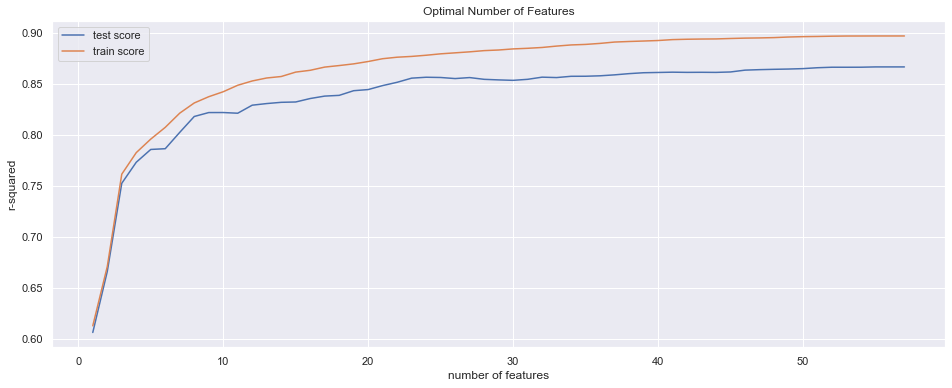

In [415]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

### Now we can choose the optimal value of number of features and build a final model.

In [416]:
# final model
n_features_optimal = 35

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)
# predict prices of X_train
y_train_pred = rfe.predict(X_train)
r2 = r2_score(y_train, y_train_pred)
print (r2)
# predict prices of X_test
y_pred = rfe.predict(X_test)
r2 = r2_score(Y_test, y_pred)
print(r2)

0.8847153119991232
0.8191794700663312


In [417]:
rfe.estimator_.coef_

array([ 0.06096736,  0.32852123,  0.14663388, -0.10317687,  0.36577284,
        0.24708482,  0.09541623,  0.09427483,  0.09415363,  0.0994991 ,
        0.10926155, -0.0507137 ,  0.10161873, -0.04172523, -0.05934187,
       -0.03297801, -0.03597283, -0.02994829, -0.03689666, -0.03133604,
        0.06895156, -0.05649443, -0.10608473, -0.09549661, -0.02955445,
        0.09137452, -0.07638335, -0.07320892, -0.07267453, -0.09760215,
       -0.03856169, -0.08552864, -0.0616064 , -0.09047694, -0.04941746])

### It is more or less same for 57 parameters Vs 30 parameters , training or test score.  but 35 seems to fetch best test score  but it is not yielding us any benefit , since it is dropping partial categorical variable features 
### Most Importantly we cannot drop partial categorical features !! either we drop all or we keep them all , SO NO Action needed.

In [418]:
# tuples of (feature name, whether selected, ranking)
# note that the 'rank' is > 1 for non-selected features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('YearBuilt', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GarageArea', True, 1),
 ('OpenPorchSF', False, 16),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('Neighborhood_BrkSide', False, 14),
 ('Neighborhood_ClearCr', False, 6),
 ('Neighborhood_CollgCr', True, 1),
 ('Neighborhood_Crawfor', True, 1),
 ('Neighborhood_Edwards', False, 3),
 ('Neighborhood_Gilbert', True, 1),
 ('Neighborhood_IDOTRR', False, 7),
 ('Neighborhood_MeadowV', True, 1),
 ('Neighborhood_Mitchel', True, 1),
 ('Neighborhood_NAmes', False, 4),
 ('Neighborhood_NPkVill', True, 1),
 ('Neighborhood_NWAmes', True, 1),
 ('Neighborhood_NoRidge', False, 22),
 ('Neighborhood_NridgHt', False, 19),
 ('Neighborhood_OldTown', True, 1),
 ('Neighborhood_SWISU', False, 20),
 ('Neighborhood_Sawyer', False, 5),
 ('Neighborhood_SawyerW', True, 1),
 ('Neighborhood_Somerst', False,

## Ridge and Lasso Regression

Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [419]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 15
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 15 folds for each of 28 candidates, totalling 420 fits


GridSearchCV(cv=15, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [420]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.5}


In [421]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = float(model_cv.best_params_['alpha'])
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.07732456  0.29176807  0.11236141 -0.10426999  0.33681517  0.22285377
  0.0934422   0.01783288  0.01657523  0.07352098  0.06774474  0.0642998
  0.0231988  -0.01713159 -0.05949447  0.09288278 -0.03568203 -0.04875239
 -0.03746218 -0.05921624 -0.05196022 -0.03236746 -0.02671823 -0.03507962
  0.01602949  0.0216466  -0.04350275 -0.00053587 -0.02432952 -0.03984761
  0.03628376  0.00820776 -0.01612571  0.05231743 -0.05126528 -0.08289276
 -0.09874645 -0.02871584  0.02704686  0.03221661  0.07147695 -0.03296912
 -0.06556797 -0.06497518 -0.08018986 -0.03087133 -0.01558901 -0.02365321
 -0.01953074 -0.08633157 -0.05557302 -0.08050858  0.         -0.03033163
  0.0376816   0.02588485  0.03147726]


In [422]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(Y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(Y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(Y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8937029385567012
0.839047356917737
2.2350549041272876
1.3640008045396192
0.0032251874518431276
0.0045925953014802


## Lasso

In [423]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 15 folds for each of 28 candidates, totalling 420 fits


GridSearchCV(cv=15, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [424]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [425]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [426]:
lasso.coef_

array([ 0.07261955,  0.31886835,  0.11531903, -0.105902  ,  0.35362331,
        0.22980784,  0.08959244,  0.01571243,  0.        ,  0.04553245,
        0.04744416,  0.04090666,  0.04328381,  0.        , -0.0404378 ,
        0.11009221, -0.0108726 , -0.02938957, -0.01647041, -0.0303185 ,
       -0.02921546, -0.00936108, -0.        , -0.01345903,  0.02435585,
        0.0309918 , -0.01911733,  0.01587263, -0.        , -0.0204131 ,
        0.04630333,  0.0075812 , -0.        ,  0.06326452, -0.04960185,
       -0.08344243, -0.08926505, -0.0214438 ,  0.02252664,  0.02941835,
        0.02927676, -0.00861898, -0.0525436 , -0.05947159, -0.07242072,
       -0.02744183, -0.01362   , -0.        , -0.01754298, -0.07893065,
       -0.05065063, -0.07580874,  0.        , -0.01072298,  0.02374734,
        0.02361986,  0.03050767])

In [427]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(Y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(Y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(Y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8922214031450926
0.8400421197016927
2.2662064048592296
1.355570640165443
0.0032701391123509805
0.004564210909647957


In [429]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.894356,0.893703,0.892221
1,R2 Score (Test),0.835637,0.839047,0.840042
2,RSS (Train),2.221321,2.235055,2.266206
3,RSS (Test),1.392899,1.364001,1.355571
4,MSE (Train),0.056616,0.056791,0.057185
5,MSE (Test),0.068483,0.067769,0.067559


### May be due to RFE based feature selection and other ways we have removed parameters, LASSO/RIDGE is not yielding much benefit ,  but there is improved test score !!

## Lets observe the changes in the coefficients after regularization

In [430]:
betas = pd.DataFrame(index=X_train.columns)

In [431]:
betas.rows = X_train.columns

In [432]:
betas['Linear'] = model.params.values[1:]
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [434]:
pd.set_option('display.max_rows', None)
betas.sort_values

<bound method DataFrame.sort_values of                              Linear     Ridge     Lasso
LotArea                7.529076e-02  0.077325  0.072620
OverallQual            3.007383e-01  0.291768  0.318868
YearBuilt              1.191261e-01  0.112361  0.115319
BsmtUnfSF             -1.110081e-01 -0.104270 -0.105902
TotalBsmtSF            3.522976e-01  0.336815  0.353623
2ndFlrSF               2.317800e-01  0.222854  0.229808
GarageArea             9.271712e-02  0.093442  0.089592
OpenPorchSF            1.501044e-02  0.017833  0.015712
MSZoning_FV            4.627147e-02  0.016575  0.000000
MSZoning_RH            1.069648e-01  0.073521  0.045532
MSZoning_RL            9.347306e-02  0.067745  0.047444
MSZoning_RM            9.215108e-02  0.064300  0.040907
Neighborhood_BrkSide   1.260068e-02  0.023199  0.043284
Neighborhood_ClearCr  -3.592052e-02 -0.017132  0.000000
Neighborhood_CollgCr  -7.443622e-02 -0.059494 -0.040438
Neighborhood_Crawfor   8.009131e-02  0.092883  0.110092
Neighborh

### Lasso has removed few parameters , all of which belong to neighborhood or Sale condition or other category , so not much use on feature reduction for model from LASSO !!!

### Lets try and double the Alpha parameter for Ridge and Lasso and see what happens 

In [436]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = float(1.)
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 7.98743054e-02  2.81943877e-01  1.06371305e-01 -9.89543649e-02
  3.22713291e-01  2.14691726e-01  9.45226984e-02  2.05522816e-02
  5.47528131e-03  5.78972225e-02  5.68953069e-02  5.14962258e-02
  2.34377862e-02 -1.03861990e-02 -5.46527866e-02  9.42752780e-02
 -3.32704148e-02 -4.31583147e-02 -4.01441205e-02 -5.19849596e-02
 -4.72993874e-02 -2.92784039e-02 -2.05640164e-02 -2.91158745e-02
  2.41378158e-02  2.67741152e-02 -4.16528905e-02  3.04642717e-04
 -2.16483760e-02 -3.35905447e-02  4.03944631e-02  1.46753914e-02
 -8.59997511e-03  5.25878241e-02 -5.01758018e-02 -7.62750495e-02
 -9.01876193e-02 -2.67715784e-02  2.54122781e-02  3.22119123e-02
  5.55247814e-02 -2.58174399e-02 -6.41565067e-02 -6.40935614e-02
 -7.87994287e-02 -3.12323232e-02 -1.67009140e-02 -1.59760460e-02
 -2.02799329e-02 -8.54553750e-02 -5.29935158e-02 -7.97773622e-02
  0.00000000e+00 -3.00162496e-02  3.48713128e-02  2.60184088e-02
  3.19169682e-02]


In [437]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(Y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(Y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(Y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8924746869627885
0.8416159198860897
2.2608807332819447
1.3422333958891561
0.003262454160580007
0.004519304363263152


## Lasso

In [438]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0002)

In [439]:
lasso.coef_

array([ 0.07516642,  0.33197616,  0.10888369, -0.10324866,  0.35286163,
        0.22553269,  0.08800347,  0.01638513, -0.        ,  0.01006091,
        0.02788671,  0.01680312,  0.03912826,  0.        , -0.03627539,
        0.10372554, -0.00744538, -0.02399381, -0.01679608, -0.0096447 ,
       -0.02371118, -0.00759828, -0.        , -0.00909292,  0.02185524,
        0.02848355, -0.01745736,  0.00993591,  0.        , -0.01469914,
        0.03027508,  0.        ,  0.        ,  0.05209042, -0.04628171,
       -0.07545993, -0.07096663, -0.01730103,  0.01624914,  0.02486459,
        0.        , -0.        , -0.04110174, -0.05512162, -0.06535907,
       -0.02494277, -0.01276896, -0.        , -0.01646192, -0.07050364,
       -0.04413807, -0.07076845,  0.        , -0.        ,  0.00457201,
        0.02023576,  0.02758671])

In [440]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(Y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(Y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(Y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8888219137177326
0.8454073952724842
2.3376857610425885
1.3101023579739164
0.0033732839264683815
0.004411119050417227


In [441]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.894356,0.892475,0.888822
1,R2 Score (Test),0.835637,0.841616,0.845407
2,RSS (Train),2.221321,2.260881,2.337686
3,RSS (Test),1.392899,1.342233,1.310102
4,MSE (Train),0.056616,0.057118,0.058080
5,MSE (Test),0.068483,0.067226,0.066416


## Lets observe the changes in the coefficients after regularization

In [ ]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Linear'] = model.params.values[1:]
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.sort_values